In [1]:
from utils import *

In [2]:
df, train, test, val = get_data(normalize=False, binary_label=True)

## Let's plot some of the columns

In [3]:
#calculate median for each column
median = df.median(axis=0)
avg = df.mean(axis=0)
print(avg)
print(median)
# compute the median of each attribute
medians = df.median()

# discretize each attribute to 0 or 1 based on the median
# for column in df.columns:
#     df[column] = (df[column] >= medians[column]).astype(int)

n_tokens_title                       10.398749
n_tokens_content                    546.514731
n_unique_tokens                       0.548216
n_non_stop_words                      0.996469
n_non_stop_unique_tokens              0.689175
num_hrefs                            10.883690
num_self_hrefs                        3.293638
num_imgs                              4.544143
num_videos                            1.249874
average_token_length                  4.548239
num_keywords                          7.223767
data_channel_is_lifestyle             0.052946
data_channel_is_entertainment         0.178009
data_channel_is_bus                   0.157855
data_channel_is_socmed                0.058597
data_channel_is_tech                  0.185299
data_channel_is_world                 0.212567
kw_min_min                           26.106801
kw_max_min                         1153.951682
kw_avg_min                          312.366967
kw_min_max                        13612.354102
kw_max_max   

In [3]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
test_model(clf, train, test, classification=True)


Time taken to train the model:  1.2172555923461914
Binary cross entropy: 15.046600166222445
Predicted mean: 0.5202421490730231 Actual mean: 0.5353764661369655
Accuracy: 0.5825450876529197


0.5825450876529197

Trying hyperparameters: 1
Time taken to train the model:  0.08614134788513184
Binary cross entropy: 14.831142258489006
Predicted mean: 0.5208891691628567 Actual mean: 0.527825949865994
Accuracy: 0.5885227810184456
Accuracy: 0.5885227810184456
Trying hyperparameters: 2
Time taken to train the model:  0.16314029693603516
Binary cross entropy: 13.512818502178872
Predicted mean: 0.5237269430868674 Actual mean: 0.527825949865994
Accuracy: 0.6250985338168059
Accuracy: 0.6250985338168059
Trying hyperparameters: 3
Time taken to train the model:  0.24067378044128418
Binary cross entropy: 13.012764663578478
Predicted mean: 0.5593567712438909 Actual mean: 0.527825949865994
Accuracy: 0.6389720952230805
Accuracy: 0.6389720952230805
Trying hyperparameters: 4
Time taken to train the model:  0.32054877281188965
Binary cross entropy: 13.063906533435334
Predicted mean: 0.5888380892322245 Actual mean: 0.527825949865994
Accuracy: 0.6375532082610752
Accuracy: 0.6375532082610752
Trying hyperparameters: 5
Ti

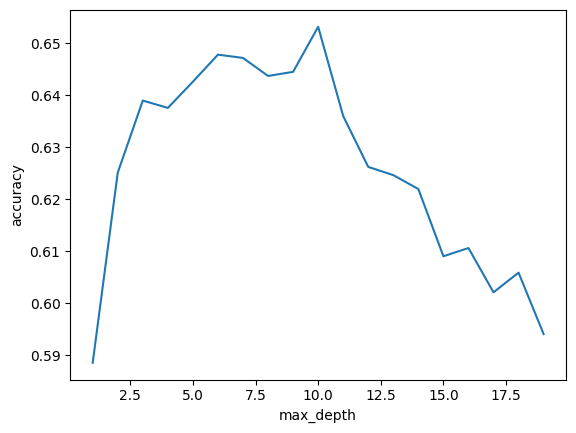

In [5]:
def get_model(param):
    return tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=param)


_, params, accuracies = optimize_hyperparameters(get_model, range(1, 20), train, test, val, classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')

Decision Tree from scratch

In [4]:
from collections import Counter
from __future__ import annotations


class ScratchDecisionTree:
    class DecisionTreeNode:
        def __init__(self, name):
            self.attribute = name
            self.value = None
            # self.parent: DecisionTreeNode | None = None
            self.children: list[ScratchDecisionTree.DecisionTreeNode] = []
            self.result = None
            self.threshold = None

    class Sample:
        def __init__(self, attributes: dict, classification):
            self.classification = classification
            self.attributes = attributes

        def get_attribute(self, attr):
            return self.attributes[attr]

    def __init__(self):
        self.root: ScratchDecisionTree.DecisionTreeNode | None = None

    def fit(self, x, y):
        assert len(x) == len(y)
        assert len(x) != 0
        # samples = []
        # index = 0
        # for i, xx in x.iterrows():
        #     a = y.iloc[index]
        #     samples.append(self.Sample(xx.to_dict(), a))
        #     index += 1
        samples = [self.Sample(xx, yy) for xx, yy in zip(x, y)]
        attributes = {x for x in range(len(x[0]))}
        assert len(attributes) != 0
        self.root = ScratchDecisionTree.build_decision_tree(samples, attributes, None)

    # def predict(self, x:DataFrame):
    #     assert self.root is not None
    #     for i,xx in x.iterrows():
    #         break
    #     b=self.Sample(xx.to_dict(),None)
    #     a=self.eval(b)
    #     return [self.eval(self.Sample(xx.to_dict(),None)) for i,xx in x.iterrows()]
    #
    # def eval(self, x: ScratchDecisionTree.Sample):
    #     node = self.root
    #     while not node.result:
    #         for nn in node.children:
    #             if x.get_attribute(node.attribute) == nn.value:
    #                 node = nn
    #                 break
    #         print("ERROR")
    #     return node.result
    @staticmethod
    def entropy(samples: list[ScratchDecisionTree.Sample]) -> float:
        if not samples:
            return 0
        p = sum(s.classification for s in samples) / len(samples)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    @staticmethod
    def information_gain(attr, samples: list[ScratchDecisionTree.Sample], threshold) -> float:
        # return random.randint(0, 100)

        a = [s for s in samples if s.get_attribute(attr) >= threshold]
        b = [s for s in samples if s.get_attribute(attr) < threshold]
        return ScratchDecisionTree.entropy(samples) - \
            len(a) / len(samples) * ScratchDecisionTree.entropy(a) - \
            len(b) / len(samples) * ScratchDecisionTree.entropy(b)

    @staticmethod
    def build_decision_tree(samples: list[ScratchDecisionTree.Sample], attributes: set, parent_most_common_result):
        new_root = ScratchDecisionTree.DecisionTreeNode(None)
        if not samples:
            new_root.result = parent_most_common_result
            return new_root
        classifications = [s.classification for s in samples]
        most_common_result = Counter(classifications).most_common(1)[0][0]
        if len(classifications) == 1 or len(attributes) == 0:
            new_root.result = most_common_result
            return new_root
        best_gain = 0
        threshold = 0
        splitting_attribute = None

        for attr in attributes:
            a_threshold = np.median([sample.get_attribute(attr) for sample in samples])
            gain = ScratchDecisionTree.information_gain(attr, samples, a_threshold)
            if gain > best_gain:
                best_gain = gain
                threshold = a_threshold
                splitting_attribute = attr
        new_root.attribute = splitting_attribute
        # values = {}
        # for sample in samples:
        #     if sample.get_attribute(splitting_attribute) not in values:
        #         values[sample.get_attribute(splitting_attribute) ] = []
        #     values[sample.get_attribute(splitting_attribute)].append(sample)
        # for value, v_samples in values.items():
        a_sample = []
        b_sample = []
        for sample in samples:
            if sample.get_attribute(splitting_attribute) >= threshold:
                a_sample.append(sample)
            else:
                b_sample.append(sample)
        for value in [0, 1]:
            v_samples = a_sample if value == 1 else b_sample
            subtree = ScratchDecisionTree.build_decision_tree(
                v_samples,
                attributes - {splitting_attribute},
                None if v_samples else most_common_result
            )
            subtree.value = value
            subtree.threshold = threshold
            new_root.children.append(subtree)
        return new_root

# clf = ScratchDecisionTree()
# time_start = time.time()
# clf.fit(train_x, train_y)
# print(time.time() - time_start)
# print("a")
# y_predict = clf.predict(test_x)

In [5]:
clf = ScratchDecisionTree()
time_start = time.time()
clf.fit(train.data, train.label)
print(time.time() - time_start)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
def predict(x: DataFrame, root: ScratchDecisionTree.DecisionTreeNode):
    # for i,xx in x.iterrows():
    #     break
    # b=ScratchDecisionTree.Sample(xx.to_dict(),None)
    # a=eval(b,root)
    return [eval(ScratchDecisionTree.Sample(xx, None), root) for xx in x]


def eval(x: ScratchDecisionTree.Sample, root: ScratchDecisionTree.DecisionTreeNode):
    node = root
    while node.result is None:
        found = False
        for nn in node.children:
            if x.get_attribute(node.attribute) >= nn.threshold and nn.value == 1 \
                    or x.get_attribute(node.attribute) < nn.threshold and nn.value == 0:
                node = nn
                found = True
                break
        if not found:
            print("ERROR")
    return node.result


print("a")
y_predict = predict(test.data, clf.root)
# # print(y_predict)
# # print(test_y)
print(accuracy_score(y_predict, test.label))

a
0.5646361457939211


In [53]:

import math
import numpy as np
from collections import Counter


class DecisionTreeClassifier:

    def __init__(self, max_depth=float('inf')):
        self.max_depth = max_depth
        self.root = None

    def fit(self, x, y):
        assert len(x) == len(y)
        assert len(x) != 0
        self.root = self._create_tree(x, y, None, self.max_depth)

    def _create_tree(self, data, labels, parent, max_depth):
        new_node = Node(None, None, parent)
        if not len(data):
            new_node.label = parent.label
            return new_node
        most_common_result = Counter(labels).most_common(1)[0][0]
        if len(labels) == 1 or data.shape[1] == 0:
            new_node.label = most_common_result
            return new_node
        if len(np.unique(labels)) == 1:
            new_node.label = labels[0]
            return new_node

        best_feature, best_threshold = self._find_best_split(data, labels)
        new_node = Node(best_feature, best_threshold, parent)

        if max_depth > 0:
            index = data[:, best_feature] <= best_threshold
            data_left = data[index]
            labels_left = labels[index]
            if len(data_left) == 0:
                new_node.label = most_common_result
            new_node.left_child = self._create_tree(data_left, labels_left, new_node, max_depth - 1)
            index = data[:, best_feature] > best_threshold
            data_right = data[index]
            labels_right = labels[index]
            if len(data_right) == 0:
                new_node.label = most_common_result
            new_node.right_child = self._create_tree(data_right, labels_right, new_node, max_depth - 1)
        else:
            new_node.label = most_common_result
            new_node.left_child = None
            new_node.right_child = None

        return new_node

    def _find_best_split(self, data, labels):
        best_gain = 0
        best_feature = None
        best_threshold = None
        for feature in range(data.shape[1]):
            # for threshold in np.unique(data[:, feature]):
                threshold = np.median(data[:, feature])
                gain = self._information_gain(data, labels, feature, threshold)
                if gain >= best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, data, labels, feature, threshold):
        entropy_labels = self._entropy(labels)
        sample_left = labels[data[:, feature] <= threshold]
        sample_right = labels[data[:, feature] > threshold]

        information_gain = entropy_labels - \
                           len(sample_left) / len(data) * self._entropy(sample_left) - \
                           len(sample_right) / len(data) * self._entropy(sample_right)

        return information_gain

    def _entropy(self, labels):
        if len(labels) == 0:
            return 0
        p = sum(labels) / len(labels)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    def predict(self, data):
        predictions = []
        for row in data:
            node = self.root
            while node.label is None:
                if row[node.feature] <= node.threshold:
                    node = node.left_child
                else:
                    node = node.right_child
            predictions.append(node.label)

        return predictions


class Node:

    def __init__(self, feature, threshold, parent):
        self.feature = feature
        self.threshold = threshold
        self.parent = parent
        self.label = None
        self.left_child = None
        self.right_child = None

# clf = DecisionTreeClassifier(max_depth=6)
# time_start = time.time()
# clf.fit(train.data[:1000], train.label[:1000])
# print(time.time() - time_start)
# y_predict = clf.predict(test.data)
# print(accuracy_score(y_predict, test.label))

In [ ]:
clf = DecisionTreeClassifier(max_depth=8)
test_model(clf, train, test, classification=True)

Trying hyperparameters: 1
Time taken to train the model:  0.5863959789276123
Binary cross entropy: 14.8368246884731
Predicted mean: 0.4973987072363235 Actual mean: 0.527825949865994
Accuracy: 0.5883651269115561
Value: 0.5883651269115561
Trying hyperparameters: 2
Time taken to train the model:  0.8722884654998779
Binary cross entropy: 13.4787239222743
Predicted mean: 0.5120605391770455 Actual mean: 0.527825949865994
Accuracy: 0.6260444584581428
Value: 0.6260444584581428
Trying hyperparameters: 3
Time taken to train the model:  1.1774959564208984
Binary cross entropy: 12.984352513658
Predicted mean: 0.5478480214409586 Actual mean: 0.527825949865994
Accuracy: 0.639760365757528
Value: 0.639760365757528
Trying hyperparameters: 4
Time taken to train the model:  1.5219182968139648
Binary cross entropy: 12.916163353848855
Predicted mean: 0.5352356928897998 Actual mean: 0.527825949865994
Accuracy: 0.6416522150402018
Value: 0.6416522150402018
Trying hyperparameters: 5
Time taken to train the mod

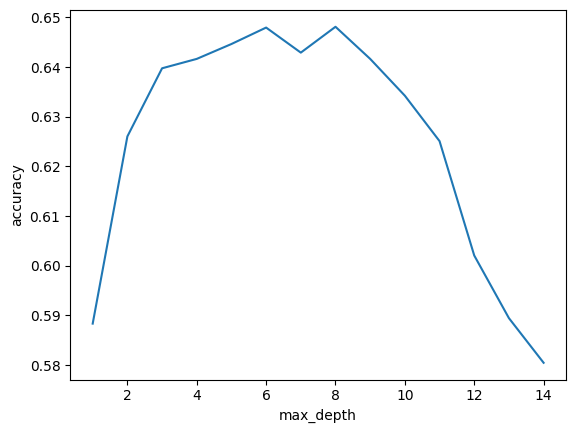

In [46]:
def get_model(param):
    return DecisionTreeClassifier(max_depth=param)


_, params, accuracies = optimize_hyperparameters(get_model, range(1, 15), train, test, val, classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')